In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

## Step 1 ##

Let us consider the stock Asian Paints, which is traded on the Indian stock markets. We download the data from yfinance for the past 8 years.

In [115]:
data = yf.Ticker("ASIANPAINT.NS").history(period="8y")

In [116]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-02-20 00:00:00+05:30,907.051544,924.937743,900.302906,920.973511,1092302,0.0,0.0
2017-02-21 00:00:00+05:30,922.814069,938.151829,921.492639,935.839355,885074,0.0,0.0
2017-02-22 00:00:00+05:30,939.237244,968.166643,938.104656,963.022583,2809160,0.0,0.0
2017-02-23 00:00:00+05:30,972.178102,972.178102,948.911874,952.356995,1580357,0.0,0.0
2017-02-27 00:00:00+05:30,953.300838,961.370849,942.918354,945.702759,738246,0.0,0.0


In [119]:
data.shape #less than 2000 rows of data, as stated in the GWP

(1976, 7)

For the analysis that follows, we consider just the closing price

In [122]:
data = data["Close"]
data.head()

Date
2017-02-20 00:00:00+05:30    920.973511
2017-02-21 00:00:00+05:30    935.839355
2017-02-22 00:00:00+05:30    963.022583
2017-02-23 00:00:00+05:30    952.356995
2017-02-27 00:00:00+05:30    945.702759
Name: Close, dtype: float64

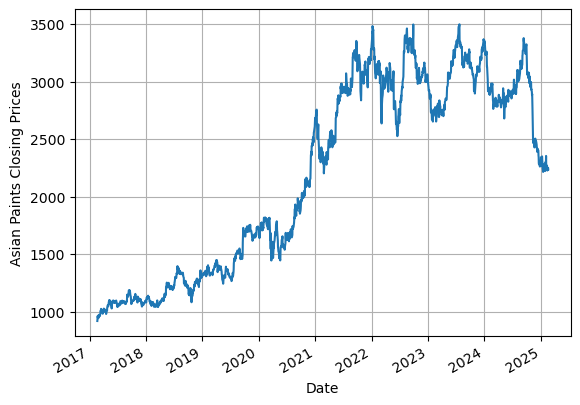

In [124]:
#Plot the time series
data.plot(ylabel="Asian Paints Closing Prices")
plt.grid()

The plot clearly shows a trend in the time series. The prices of the Asian Paints stock clearly rises with time.

In [127]:
data.describe() #summary statistics for the untransformed time series

count    1976.000000
mean     2195.651207
std       827.652936
min       920.973511
25%      1331.475555
50%      2325.289307
75%      2987.162354
max      3497.630127
Name: Close, dtype: float64

Note that the series has a high standard deviation of 827.44, and a mean of 2196.67.

Text(0.5, 1.0, 'Histogram of Asian Paints Closing Price')

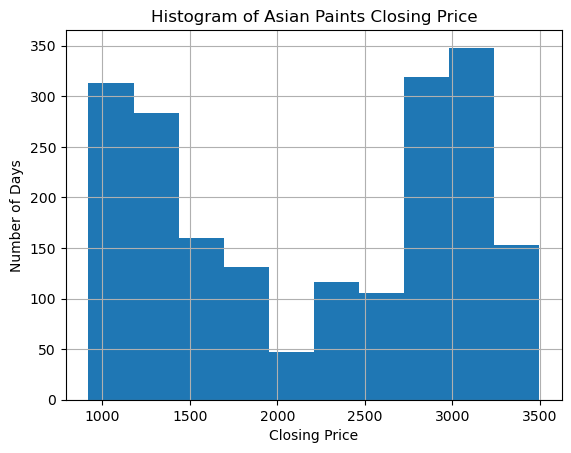

In [130]:
data.hist(bins = 10)
plt.xlabel("Closing Price")
plt.ylabel("Number of Days")
plt.title("Histogram of Asian Paints Closing Price")

Let us check for the presence of autocorrelation in the time series with different lags

In [155]:
for i in [1, 5, 10, 50, 100, 200, 500, 1000]:
    print(data.autocorr(lag = i))

0.9991062672108102
0.9951968958623877
0.9905210152122637
0.9484696006144736
0.915702937172274
0.8853389636942259
0.6547176694866017
-0.3400787601951159


As you can see, the time series is heavily autocorrelated

Let us test for stationarity using the Augmented Dickey-Fuller test

In [190]:
adf_result_data = adfuller(data)
adf_statistic = adf_result_data[0] 
p_value = adf_result_data[1]
used_lags = adf_result_data[2] 
critical_values = adf_result_data[4] 

adf_statistic, p_value, used_lags, critical_values

(-1.5733534420467572,
 0.49696362590909265,
 1,
 {'1%': -3.43366703339965,
  '5%': -2.8630052761696607,
  '10%': -2.567550052177805})

Note that the adf_statistic of -1.57 is higher than all the critical values. The p-value is 0.49 which is greater than 0.05. This means that we fail to reject the null hypothesis (that the series has a unit root). So, the untransformed time series for the Asian Paints NSE stock can be said be non-stationary.

In [166]:
differenced_data = data.diff()[1:]

In [168]:
differenced_data.head()

Date
2017-02-21 00:00:00+05:30    14.865845
2017-02-22 00:00:00+05:30    27.183228
2017-02-23 00:00:00+05:30   -10.665588
2017-02-27 00:00:00+05:30    -6.654236
2017-02-28 00:00:00+05:30    21.000854
Name: Close, dtype: float64

Text(0, 0.5, 'Differenced Prices [Lag 1]')

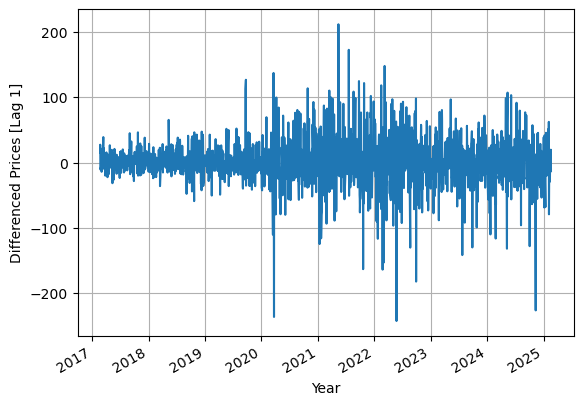

In [172]:
differenced_data.plot()
plt.grid()
plt.xlabel("Year")
plt.ylabel("Differenced Prices [Lag 1]")

In [174]:
for i in [1, 5, 10, 50, 100, 200, 500, 1000]:
    print(differenced_data.autocorr(lag = i))

0.04831756542463201
-0.013910396701190918
0.0014340801022143233
-0.06203675982336694
-0.06338604586920575
0.004056633838125725
-0.014843564254303887
0.020331812537574045


In [176]:
differenced_data.describe()

count    1975.000000
mean        0.666646
std        34.993727
min      -242.193848
25%       -13.613647
50%         0.394775
75%        16.026367
max       211.207520
Name: Close, dtype: float64

The differenced time series seems to be de-trended now. Let us now test for stationarity.

In [198]:
adf_result_differenced_data = adfuller(differenced_data)
adf_statistic = adf_result_differenced_data[0] 
p_value = adf_result_differenced_data[1]
used_lags = adf_result_differenced_data[2] 
critical_values = adf_result_differenced_data[4] 

adf_statistic, p_value, used_lags, critical_values

(-42.31104980002484,
 0.0,
 0,
 {'1%': -3.43366703339965,
  '5%': -2.8630052761696607,
  '10%': -2.567550052177805})

Here, note that the p value is zero and the adf_statistic of -42.31 is lesser than all the critical values, which implies that the differenced time series is stationary.

Now, let us attempt to implement fractional differencing

In [206]:
def getWeights(d,lags):
    # calculate the weights from the series expansion of the differencing operator
    # for real orders d and up to [lags] number of coefficients
    w=[1]
    for k in range(1,lags):
        w.append(-w[-1]*((d-k+1))/k)
    w=np.array(w).reshape(-1,1) 
    return w

In [254]:
def fractional_differencing(series, order, cutoff):
    #calculate the time series obtained from fractional differencing
    weights=getWeights(order, cutoff)
    frac_diff_series = 0
    for k in range(cutoff):
        frac_diff_series += weights[k]*series.shift(k).fillna(0)
    return frac_diff_series[cutoff:] 

In [292]:
frac_diff_series = fractional_differencing(data, 0.75, 10) #considering d = 0.75 for now and we consider 10 terms in the series

Text(0, 0.5, 'Series After Fractional Differencing with d = 0.75')

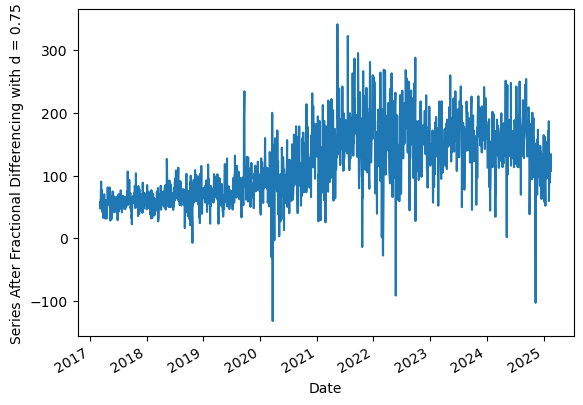

In [294]:
frac_diff_series.plot()
plt.ylabel("Series After Fractional Differencing with d = 0.75")

In [290]:
frac_diff_series.describe()

count    1966.000000
mean      116.576470
std        55.795088
min      -131.675744
25%        68.407617
50%       111.407579
75%       159.613780
max       340.877835
Name: Close, dtype: float64

In [296]:
adf_result_frac_diff_data = adfuller(frac_diff_series)
adf_statistic = adf_result_frac_diff_data[0] 
p_value = adf_result_frac_diff_data[1]
used_lags = adf_result_frac_diff_data[2] 
critical_values = adf_result_frac_diff_data[4] 

adf_statistic, p_value, used_lags, critical_values

(-2.1453177514676627,
 0.22668663647120402,
 26,
 {'1%': -3.433726987192922,
  '5%': -2.863031745358185,
  '10%': -2.5675641457890093})

Note that for this fractional differenced series with d = 0.75, the adf_statistic is higher than the critical values. The p-value of 0.22 also indicates that this fractional differenced series is not stationary.